In [1]:
pip install python-binance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from binance import Client
import datetime as dt
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import matplotlib
matplotlib.style.use('seaborn')
# client configuration
api_key = 'xxx' 
api_secret = 'xxxx'
client = Client(api_key, api_secret)

In [3]:
#tickers = pd.DataFrame(client.get_all_tickers()) #client.get_all_tickers() this is going to help us to obtain all the tickers.
#list_symbols = tickers["symbol"]

In [4]:
#filt = []
#word = str("USDT")
#for i in list_symbols:

 # if word in i: # here we select only XXXUSDT pairs.

  #  filt.append(i)

#filt1 = filt[:50] #filter for 50 pairs

In [5]:
#interval="15m" #here we select the timeframe we are going to use in order to do the analysis.
#Client.KLINE_INTERVAL_15MINUTE 
#data = [pd.DataFrame(client.get_historical_klines(i, interval, "15 jan,2023")) for i in filt1 ]

#for i in range(len(data)-1,0,-1):
  
 #   if data[i].empty: #here we clean the data, deleting those with empty data.
  #   del data[i]
    
   # data[i]["symbol"] = filt1[i]
  
    

In [3]:


exchange_info = client.get_exchange_info()
symbols = exchange_info['symbols']
available_symbols = [symbol['symbol'] for symbol in symbols if symbol['status'] == 'TRADING']

tickers = pd.DataFrame(client.get_all_tickers())
list_symbols = tickers["symbol"]

filt = []
word = str("USDT")
for i in list_symbols:
    if i in available_symbols and word in i:
        filt.append(i)

filt1 = filt[:50] #filter for 50 pairs

start = dt.datetime(2023, 2, 28)
end = dt.datetime(2022, 3, 8)

interval="15m"
data = [pd.DataFrame(client.get_historical_klines(i, interval, start_str=start.strftime("%d %b, %Y"), )) for i in filt1 ]

for i in range(len(data)-1,0,-1):
    if data[i].empty:
        del data[i]
    data[i]["symbol"] = filt1[i]


In [4]:
data[0].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore"]
data[0]["symbol"] = filt1[0]

In [5]:
for i in range(len(data)):
  data[i].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore","symbol"]
  data[i].index = [dt.datetime.fromtimestamp(i/1000.0) for i in data[i].close_time]

In [6]:
full_data = []

full_data = pd.concat(data)

In [7]:
full_data = pd.DataFrame(full_data.set_index(['symbol',full_data.index])["close"])

In [8]:
symbols = list(set(full_data.index.get_level_values(0)))


In [9]:
len(symbols)

50

In [10]:
cl = full_data.loc["BTCUSDT"][["close"]]


In [11]:
cl.rename({"close": "BTCUSDT"}, axis = 1, inplace= True)

In [12]:
for i in symbols:
  if i !="BTCUSDT":
    cl[i]= full_data.loc[i][["close"]]

In [13]:
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint


In [15]:
cl_200 = cl[-200:]
cn = cl.isnull().any()

cols_to_drop = cn[cn == True].index.tolist()
cl.drop(columns=cols_to_drop, inplace=True)

In [16]:
cl = cl.astype(float)


In [17]:
cl

,BTCUSDT,NULSUSDT,TRXUSDT,DUSKUSDT,THETAUSDT,TOMOUSDT,COSUSDT,ETHUSDT,ZRXUSDT,ONGUSDT,...,ONEUSDT,QTUMUSDT,CELRUSDT,DOGEUSDT,PERLUSDT,FTMUSDT,LINKUSDT,HOTUSDT,ZILUSDT,ZECUSDT
2023-02-27 19:14:59.999,23483.83,0.2857,0.06957,0.2132,1.177,0.4388,0.00729,1633.07,0.2602,0.3341,...,0.02205,3.439,0.02074,0.08132,0.02469,0.4555,7.247,0.002080,0.03259,44.2
2023-02-27 19:29:59.999,23484.13,0.2852,0.06951,0.2128,1.175,0.4373,0.00730,1631.59,0.2610,0.3338,...,0.02191,3.448,0.02071,0.08158,0.02458,0.4559,7.261,0.002084,0.03240,44.1
2023-02-27 19:44:59.999,23473.58,0.2846,0.06949,0.2132,1.176,0.4361,0.00730,1630.44,0.2627,0.3332,...,0.02194,3.440,0.02077,0.08194,0.02446,0.4552,7.273,0.002083,0.03227,44.2
2023-02-27 19:59:59.999,23420.55,0.2807,0.06972,0.2126,1.175,0.4355,0.00730,1628.44,0.2617,0.3330,...,0.02187,3.428,0.02074,0.08267,0.02421,0.4536,7.273,0.002078,0.03218,44.1
2023-02-27 20:14:59.999,23456.99,0.2827,0.06978,0.2171,1.178,0.4393,0.00731,1631.61,0.2628,0.3328,...,0.02195,3.434,0.02086,0.08200,0.02490,0.4560,7.286,0.002086,0.03232,44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11 15:44:59.999,20393.16,0.2458,0.05872,0.1492,0.899,0.3470,0.00561,1467.21,0.1983,0.2461,...,0.01549,2.478,0.01514,0.06586,0.03116,0.3295,6.143,0.001557,0.02253,31.3
2023-03-11 15:59:59.999,20349.40,0.2431,0.05837,0.1500,0.898,0.3473,0.00561,1466.21,0.1988,0.2469,...,0.01559,2.477,0.01511,0.06594,0.03223,0.3310,6.139,0.001555,0.02248,31.3
2023-03-11 16:14:59.999,20338.15,0.2435,0.05857,0.1494,0.897,0.3478,0.00560,1462.01,0.1978,0.2469,...,0.01568,2.466,0.01511,0.06572,0.03219,0.3315,6.125,0.001557,0.02232,31.2
2023-03-11 16:29:59.999,20304.76,0.2430,0.05840,0.1488,0.893,0.3467,0.00560,1459.72,0.1975,0.2466,...,0.01559,2.459,0.01505,0.06556,0.03222,0.3297,6.109,0.001553,0.02229,31.1


In [20]:
def find_cointegrated_pairs(data):
    n = len(data.columns)
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            if not (data[keys[i]].isna().any() or data[keys[j]].isna().any()): # skip if either column has NaN values
                result = coint(data[keys[i]], data[keys[j]])
                pvalue_matrix[i, j] = result[1]
                if result[1] < 0.05:
                    pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

pvalues, pairs = find_cointegrated_pairs(cl)

In [21]:
pvalues, pairs = find_cointegrated_pairs(cl)  

In [22]:
pv = pd.DataFrame(pvalues)
pv.columns = cl.columns
pv.index = cl.columns

In [23]:
pv1 = pv.unstack().sort_values()

In [24]:
pv1

ZILUSDT    OMGUSDT      0.000187
DOGEUSDT   WAVESUSDT    0.000672
WAVESUSDT  BATUSDT      0.000746
DOGEUSDT   XLMUSDT      0.000831
ONEUSDT    ALGOUSDT     0.000842
                          ...   
XMRUSDT    ATOMUSDT     1.000000
           WAVESUSDT    1.000000
           EOSUSDT      1.000000
OMGUSDT    LTCUSDT      1.000000
ZECUSDT    ZECUSDT      1.000000
Length: 2304, dtype: float64

In [25]:
pv2 = pv1[pv1 <= 0.05]

In [26]:
len(pv2)

116

In [27]:
pv2 = pv2.reset_index()

In [28]:
pv2

,level_0,level_1,0
0,ZILUSDT,OMGUSDT,0.000187
1,DOGEUSDT,WAVESUSDT,0.000672
2,WAVESUSDT,BATUSDT,0.000746
3,DOGEUSDT,XLMUSDT,0.000831
4,ONEUSDT,ALGOUSDT,0.000842
...,...,...,...
111,FTMUSDT,ONEUSDT,0.048302
112,QTUMUSDT,WINUSDT,0.048744
113,ZRXUSDT,NULSUSDT,0.048968
114,DOGEUSDT,QTUMUSDT,0.049536


In [29]:
#Stationary analysis with DFA

#keys = fil.keys()
pvalue_matrix = pd.DataFrame(index=cl.index)
pvalue_matrix.index = cl.index
for i in range(len(pv2)):
           
    names3 = pv2["level_0"].loc[i],pv2["level_1"].loc[i]
    result = adfuller(cl[pv2['level_0'].loc[i]] / cl[pv2['level_1'].loc[i]])[1]
    #pvalue_matrix[('fil[i].columns,fil[j].columns'), fil.index ] = result[0]
            
    pvalue_matrix[ names3] = np.array(result, dtype=object)
            #if result[1] < 0.05:


C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\380496176.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pvalue_matrix[ names3] = np.array(result, dtype=object)
C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\380496176.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pvalue_matrix[ names3] = np.array(result, dtype=object)
C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\380496176.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [34]:
pvalue_matrix = pvalue_matrix[pvalue_matrix< 0.05].iloc[0].dropna()

In [30]:
pvalue_matrix

,"(ZILUSDT, OMGUSDT)","(DOGEUSDT, WAVESUSDT)","(WAVESUSDT, BATUSDT)","(DOGEUSDT, XLMUSDT)","(ONEUSDT, ALGOUSDT)","(HOTUSDT, VETUSDT)","(OMGUSDT, ONGUSDT)","(COCOSUSDT, TOMOUSDT)","(ADAUSDT, OMGUSDT)","(COCOSUSDT, DUSKUSDT)",...,"(WAVESUSDT, FETUSDT)","(HOTUSDT, PERLUSDT)","(WAVESUSDT, VETUSDT)","(FTMUSDT, WINUSDT)","(ZILUSDT, PERLUSDT)","(FTMUSDT, ONEUSDT)","(QTUMUSDT, WINUSDT)","(ZRXUSDT, NULSUSDT)","(DOGEUSDT, QTUMUSDT)","(LINKUSDT, DOGEUSDT)"
2023-02-27 19:14:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-02-27 19:29:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-02-27 19:44:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-02-27 19:59:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-02-27 20:14:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11 15:44:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-03-11 15:59:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-03-11 16:14:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497
2023-03-11 16:29:59.999,0.02436,0.114372,0.186476,0.866956,0.042848,0.14409,0.00747,0.544684,0.852016,0.000219,...,0.659997,0.441651,0.120908,0.288585,0.422916,0.011092,0.059551,0.799648,0.48442,0.208497


In [31]:
pvalue_matrix = pvalue_matrix.reset_index() 

In [32]:
pvalue_matrix["index"] = pvalue_matrix["index"].astype(str)


In [38]:
import re
pvalue_matrix["index"] = pvalue_matrix["index"].str.replace(re.compile(r'[()]'), '', regex=True)

In [39]:
pvalue_matrix[['col1', 'col2']] = pvalue_matrix["index"].str.split(",", expand=True)

In [40]:
pvalue_matrix = pvalue_matrix.drop("index", axis=1)

In [41]:
pvalue_matrix.head(1)

,2023-01-14 19:14:59.999000,col1,col2
0,0.000007,'COSUSDT','MTLUSDT'


In [33]:
#OLS Beta calculation and cointegration analysis with DFA


adf_matrix = pd.DataFrame(index=cl.index)
spread_matrix = pd.DataFrame(index= cl.index)
beta_matrix= pd.DataFrame(index=cl.index)
ratio= pd.DataFrame(index=cl.index)
ma30= pd.DataFrame(index=cl.index)
std30= pd.DataFrame(index=cl.index)
volatility= pd.DataFrame(index=cl.index) 

for i in range(len(pv2)):
           
    names3 = pv2["level_0"].loc[i],pv2["level_1"].loc[i]
    beta_result = sm.OLS(cl[pv2['level_0'].loc[i]], cl[pv2['level_1'].loc[i]]).fit().params[0]
    spread = cl[pv2['level_0'].loc[i]] - cl[pv2['level_1'].loc[i]]*beta_result
    adf = adfuller(spread, maxlag =1)
    spread_matrix[ names3] = np.array(spread, dtype=object)
    adf_matrix[ names3] = np.array(adf[1], dtype=object)
    beta_matrix[ names3] = np.array(beta_result, dtype=object)
    
    volatility[ names3] = cl[pv2['level_1'].loc[i]].rolling(window=30).std()
    
    
                    
                    
    
#for Z score generation. 

    #ratio[ names3] = cl[pv2['level_0'].loc[i]] / cl[pv2['level_1'].loc[i]]
    
    ratio[ names3] = np.array(cl[pv2['level_0'].loc[i]] / cl[pv2['level_1'].loc[i]], dtype = object)
    #ma30[ names3]= ratio.rolling(window=30).mean()
    
    #std30[ names3] = ratio.rolling(window=30).std()
    #print(type(pv2['level_0'].loc[i]))
    
               
    
                                            
             
    
            #if result[1] < 0.05:

C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\2934549743.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spread_matrix[ names3] = np.array(spread, dtype=object)
C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\2934549743.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adf_matrix[ names3] = np.array(adf[1], dtype=object)
C:\Users\rordosgoitia\AppData\Local\Temp\ipykernel_9988\2934549743.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [34]:
volatility

volz = (volatility - volatility.mean())/volatility.std()
volz = volz.dropna()

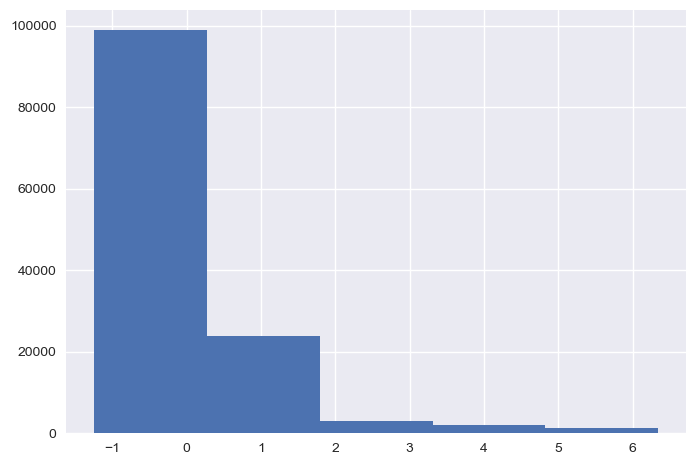

2023-02-28 02:29:59.999   -0.125332
2023-02-28 02:44:59.999   -0.113464
2023-02-28 02:59:59.999    0.000963
2023-02-28 03:14:59.999    0.062254
2023-02-28 03:29:59.999    0.093197
                             ...   
2023-03-11 15:44:59.999   -0.005498
2023-03-11 15:59:59.999    0.092771
2023-03-11 16:14:59.999    0.146258
2023-03-11 16:29:59.999    0.166371
2023-03-11 16:44:59.999    0.172804
Length: 129224, dtype: float64

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# concatenate all columns into a single series
concat_series = pd.concat([volz[col] for col in volz.columns])

# plot histogram of concatenated series
plt.hist(concat_series, bins=5)
plt.show()
concat_series

In [36]:
#this is a moving average mean
ma30 = ratio.rolling(window=200).mean().dropna()
std30 = ratio.rolling(window=200).std().dropna()

mask = std30.eq(0).any()

mask = ~mask

std30 = std30.loc[:,mask]

ma30 = ma30[ma30.columns.intersection(std30.columns)]

zscore = ((ratio-ma30)/std30).dropna()

In [66]:
zscoreld = ((ratio-ratio.mean())/np.std(ratio)).dropna()

In [37]:
zscore2 = zscore

In [38]:
zscore2.columns =  spread_matrix.columns

In [39]:
#common_cols = [col for col in set(zscore.columns).intersection(adf_f.index)]


In [40]:
adf_f = adf_matrix[adf_matrix< 0.05].iloc[0].dropna()

In [41]:
zcore_f = zscore[adf_f.index]

volz = volz[adf_f.index]

In [43]:
# set the signal and position values
signal = pd.DataFrame(index=dx.index, columns=['signal', 'position'])
signal = signal.fillna(0)  # fill the new dataframe with 0's

last_signal = 0
cond_buy = False
cond_sell = False

for i in range(len(dx.index)):
    
    if dx.iloc[i] < -1.8:
        if not cond_buy and last_signal != -1:
            last_signal = -1
            cond_buy = True
            cond_sell = False
            
        elif last_signal == -1 and cond_buy:
            last_signal = 0
            

    elif dx.iloc[i] > -0.2:
        if not cond_sell and last_signal != 1 and cond_buy:
            last_signal = 1
            
            cond_sell = True
            cond_buy = False
        elif last_signal == 1 and cond_sell:
            last_signal = 0
            
    elif cond_buy or cond_sell:
        last_signal = 0
        
    signal.iloc[i] = [last_signal, 0]




NameError: name 'dx' is not defined

In [130]:
dx

2022-08-15 20:59:59.999   -0.154801
2022-08-15 21:14:59.999   -0.190488
2022-08-15 21:29:59.999   -0.087483
2022-08-15 21:44:59.999    0.121988
2022-08-15 21:59:59.999    0.108505
                             ...   
2022-09-06 18:14:59.999    0.270919
2022-09-06 18:29:59.999    0.553115
2022-09-06 18:44:59.999   -0.217273
2022-09-06 18:59:59.999    0.719568
2022-09-06 19:14:59.999    0.127802
Name: (THETAUSDT, DENTUSDT), Length: 2106, dtype: object

In [158]:
signal["position"] = cl["THETAUSDT"]*signal["signal"]
signal["price"] = cl["THETAUSDT"]

In [159]:
signal["profit"] = signal["position"].cumsum()

In [160]:
signal["profit"].tail(1)

2023-02-26 21:59:59.999    0.001
Name: profit, dtype: float64

<IPython.core.display.Javascript object>


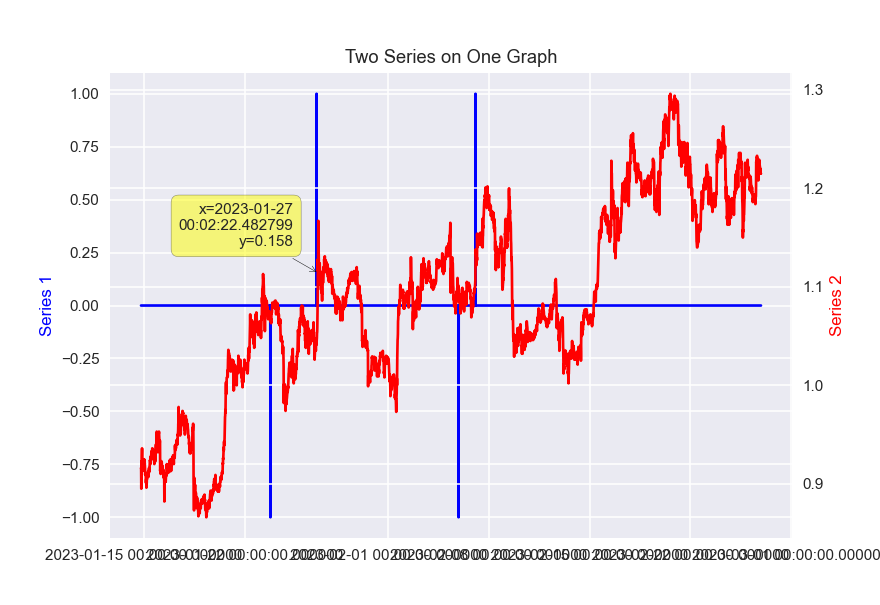

In [161]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors

# create the figure and the left and right axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the first series on the left axis in blue
ax1.plot(signal.index, signal["signal"], color='blue')
ax1.set_ylabel('Series 1', color='blue')

# plot the second series on the right axis in red
ax2.plot(signal.index, signal["price"], color='red')
ax2.set_ylabel('Series 2', color='red')

# add a title and labels for the x-axis and both y-axes
plt.title('Two Series on One Graph')
plt.xlabel('X Values')

date_fmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f')
ax1.xaxis.set_major_formatter(date_fmt)

# create a cursor that displays the x and y values on hover
mplcursors.cursor(ax1, hover=True)

plt.show()

In [44]:
big_signal = pd.DataFrame(index=zcore_f.index)

for column in zcore_f.columns:
    signal = pd.DataFrame(index=zcore_f.index, columns=['signal', 'position'])
    signal = signal.fillna(0)
    
    last_signal = 0
    cond_buy = False
    cond_sell = False
    
    for i in range(len(zcore_f)):
        dx = zcore_f[column].iloc[i]
        vx = volz[column].iloc[i]
        #if (dx < -1.8) and (vx>2):
        if dx < -1.8:
                
            if not cond_buy and last_signal != -1:
                last_signal = -1
                cond_buy = True
                cond_sell = False
                
            elif last_signal == -1 and cond_buy:
                last_signal = 0

        elif dx > -0.2:
            if not cond_sell and last_signal != 1 and cond_buy:
                last_signal = 1
                
                cond_sell = True
                cond_buy = False
            elif last_signal == 1 and cond_sell:
                last_signal = 0

        elif cond_buy or cond_sell:
            last_signal = 0
            
        signal.iloc[i] = [last_signal, 0]
        
    big_signal = pd.concat([big_signal, signal['signal']], axis=1)

big_signal.columns = zcore_f.columns




In [53]:
big_signalx = big_signal.loc["2023-03-08"]


In [70]:
big_signal.columns

Index([  ('MTLUSDT', 'IOSTUSDT'),    ('WINUSDT', 'VETUSDT'),
        ('WAVESUSDT', 'VETUSDT'),   ('DENTUSDT', 'MTLUSDT'),
       ('NULSUSDT', 'WAVESUSDT'),    ('MTLUSDT', 'VETUSDT'),
        ('ZECUSDT', 'WAVESUSDT'),  ('ENJUSDT', 'WAVESUSDT'),
          ('MTLUSDT', 'COSUSDT'),   ('LINKUSDT', 'COSUSDT'),
       ('IOSTUSDT', 'WAVESUSDT'),  ('DENTUSDT', 'IOSTUSDT'),
         ('ALGOUSDT', 'HOTUSDT'),  ('ONTUSDT', 'WAVESUSDT'),
        ('WAVESUSDT', 'COSUSDT'),  ('ONGUSDT', 'WAVESUSDT'),
        ('THETAUSDT', 'ONGUSDT'),    ('ONTUSDT', 'WINUSDT'),
          ('OMGUSDT', 'VETUSDT'),  ('OMGUSDT', 'WAVESUSDT'),
          ('OMGUSDT', 'ONTUSDT'),  ('DENTUSDT', 'QTUMUSDT'),
         ('IOSTUSDT', 'WINUSDT'),    ('BNBUSDT', 'BTCUSDT'),
         ('MTLUSDT', 'QTUMUSDT'),    ('ETHUSDT', 'TRXUSDT'),
          ('BATUSDT', 'ENJUSDT'),    ('ENJUSDT', 'ZILUSDT'),
         ('DASHUSDT', 'FETUSDT'),    ('ONTUSDT', 'VETUSDT'),
         ('DENTUSDT', 'WINUSDT'),   ('DENTUSDT', 'VETUSDT'),
          ('OMGUSDT', 'W

<AxesSubplot:>

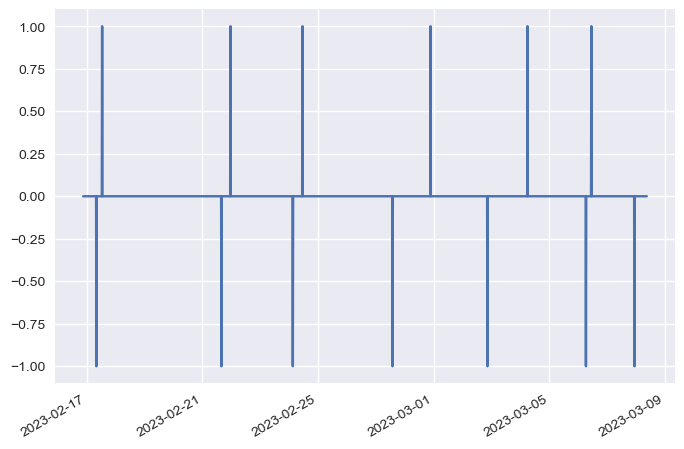

In [71]:
big_signal[('QTUMUSDT', 'DOCKUSDT')].plot()

In [72]:

#big_signal = big_signal.loc[:, ~(big_signal == 0).all(axis=0)]


In [73]:
big_signal2 = big_signal

In [372]:
big_signal2 = big_signal2.iloc[0].reset_index()

In [373]:
big_signal2["index"] = big_signal2["index"].astype(str)




In [374]:
import re
big_signal2["index"] = big_signal2["index"].str.replace(re.compile(r'[()]'), '', regex=True)

big_signal2[['col1', 'col2']] = big_signal2["index"].str.split(",", expand=True)

big_signal2 = big_signal2.drop("index", axis=1)

In [375]:
big_signal2 = big_signal2.replace("'", "", regex=True)

In [379]:
big_signal2

,2022-02-16 20:59:59.999000,col1,col2
0,0,XRPUSDT,ONGUSDT
1,0,QTUMUSDT,CELRUSDT
2,0,COSUSDT,OMGUSDT
3,0,XLMUSDT,ALGOUSDT
4,0,EOSUSDT,XLMUSDT
...,...,...,...
66,0,LTCUSDT,ICXUSDT
67,0,ONGUSDT,ETHUSDT
68,0,ALGOUSDT,ADAUSDT
69,0,NULSUSDT,ADAUSDT


In [380]:
position = pd.DataFrame(index=cl.index)
profit = pd.DataFrame(index= cl.index)

# create a list of all columns to be added to the position DataFrame
cols_to_add = []

for i in range(len(big_signal2)):
    
    names3 = big_signal2["col1"].loc[i], big_signal2["col2"].loc[i].strip()
    
    #price = cl[big_signal1["col1"].loc[i]]
    
    pricesignal = cl[big_signal2["col1"].loc[i].strip()] * big_signal[names3]
    
    
    
    # add the new column to the list of columns to be added
    cols_to_add.append(pd.Series(pricesignal, name=names3))
    
# concatenate all columns at once
position = pd.concat(cols_to_add, axis=1)

profit = position.cumsum()

In [381]:
import pandas as pd

cycles = {}
for col in position.columns:
    cycles[col] = []
    buy_idx = None
    for i, val in enumerate(position[col]):
        if val < 0:
            # found a buy point
            if buy_idx is None:
                buy_idx = i
        elif val > 0:
            # found a sell point
            if buy_idx is not None:
                cycles[col].append((buy_idx, i))
                buy_idx = None

# calculate the return for each buy-sell cycle and for the overall column
returns = {}
for col, cycle_list in cycles.items():
    total_return = 1
    cycle_returns = []
    for cycle in cycle_list:
        buy_price = position.iloc[cycle[0], position.columns.get_loc(col)]
        sell_price = position.iloc[cycle[1], position.columns.get_loc(col)]
        cycle_return = (sell_price + buy_price) / -buy_price
        cycle_returns.append(cycle_return)
        total_return *= (1 + cycle_return)
    overall_return = total_return - 1
    returns[col] = {'cycle_returns': cycle_returns, 'overall_return': overall_return}

# print the results
for col, data in returns.items():
    print(f"Column {col}")
    print(f"Cycle returns: {data['cycle_returns']}")
    print(f"Overall return: {data['overall_return']}")
    print()

Column ('XRPUSDT', 'ONGUSDT')
Cycle returns: [0.006396588486140652]
Overall return: 0.006396588486140553

Column ('QTUMUSDT', 'CELRUSDT')
Cycle returns: [-0.04390166028097068]
Overall return: -0.043901660280970645

Column ('COSUSDT', 'OMGUSDT')
Cycle returns: [0.05203136136849606]
Overall return: 0.052031361368495954

Column ('XLMUSDT', 'ALGOUSDT')
Cycle returns: [-0.00106894708711907]
Overall return: -0.001068947087119021

Column ('EOSUSDT', 'XLMUSDT')
Cycle returns: [-0.015013648771610518]
Overall return: -0.015013648771610488

Column ('TFUELUSDT', 'COCOSUSDT')
Cycle returns: [-0.0606531881804043]
Overall return: -0.06065318818040433

Column ('QTUMUSDT', 'ONGUSDT')
Cycle returns: [-0.031184091593853547, 0.004751011789547798]
Overall return: -0.026581235791114488

Column ('PERLUSDT', 'COCOSUSDT')
Cycle returns: [-0.0180124223602485, 0.05653431501446224]
Overall return: 0.037503572694325804

Column ('QTUMUSDT', 'LTCUSDT')
Cycle returns: [-0.10206849779586291]
Overall return: -0.1020684

In [382]:
returns = {}
stop_loss = -0.03

for col, cycle_list in cycles.items():
    cycle_returns = []
    cycle_ends = []
    cycle_starts = []
    cycle_time = []
    price_starts = []
    price_ends = []
    for cycle in cycle_list:
        buy_price = position.iloc[cycle[0], position.columns.get_loc(col)]
        sell_price = position.iloc[cycle[1], position.columns.get_loc(col)]
        cycle_return = (sell_price + buy_price) / -buy_price
        if cycle_return < stop_loss:
            cycle_return = stop_loss
        cycle_returns.append(cycle_return)
        cycle_ends.append(position.index[cycle[0]])
        cycle_starts.append(position.index[cycle[1]])
        cycle_time.append(position.index[cycle[1]] - position.index[cycle[0]])
        price_starts.append(buy_price)
        price_ends.append(sell_price)
    total_return = np.prod([1 + ret for ret in cycle_returns]) - 1
    returns[col] = {"cycle_starts": cycle_starts, "cycle_ends": cycle_ends, "cycle_time": cycle_time, "cycle_returns": cycle_returns, "overall_return": total_return, "buy_prices": price_starts, "sell_prices": price_ends}

for col, data in returns.items():
    print(f"Column {col}")
    print(f"Cycle starts: {data['cycle_starts']}")
    print(f"Cycle ends: {data['cycle_ends']}")
    print(f"Cycle time: {data['cycle_time']}")
    print(f"Cycle returns: {data['cycle_returns']}")
    print(f"Overall return: {data['overall_return']}")
    print(f"Buy prices: {data['buy_prices']}")
    print(f"Sell prices: {data['sell_prices']}")
    print()



Column ('XRPUSDT', 'ONGUSDT')
Cycle starts: [Timestamp('2022-02-24 15:14:59.999000')]
Cycle ends: [Timestamp('2022-02-21 20:14:59.999000')]
Cycle time: [Timedelta('2 days 19:00:00')]
Cycle returns: [0.006396588486140652]
Overall return: 0.006396588486140553
Buy prices: [-0.7035]
Sell prices: [0.708]

Column ('QTUMUSDT', 'CELRUSDT')
Cycle starts: [Timestamp('2022-02-26 19:59:59.999000')]
Cycle ends: [Timestamp('2022-02-25 20:14:59.999000')]
Cycle time: [Timedelta('0 days 23:45:00')]
Cycle returns: [-0.03]
Overall return: -0.030000000000000027
Buy prices: [-6.264]
Sell prices: [5.989]

Column ('COSUSDT', 'OMGUSDT')
Cycle starts: [Timestamp('2022-02-26 13:14:59.999000')]
Cycle ends: [Timestamp('2022-02-25 17:59:59.999000')]
Cycle time: [Timedelta('0 days 19:15:00')]
Cycle returns: [0.05203136136849606]
Overall return: 0.052031361368495954
Buy prices: [-0.01403]
Sell prices: [0.01476]

Column ('XLMUSDT', 'ALGOUSDT')
Cycle starts: [Timestamp('2022-02-23 14:29:59.999000')]
Cycle ends: [Times

In [179]:
cl["DENTUSDT"].loc["2022-08-16 23:14:59.999000"]

0.001235

<IPython.core.display.Javascript object>


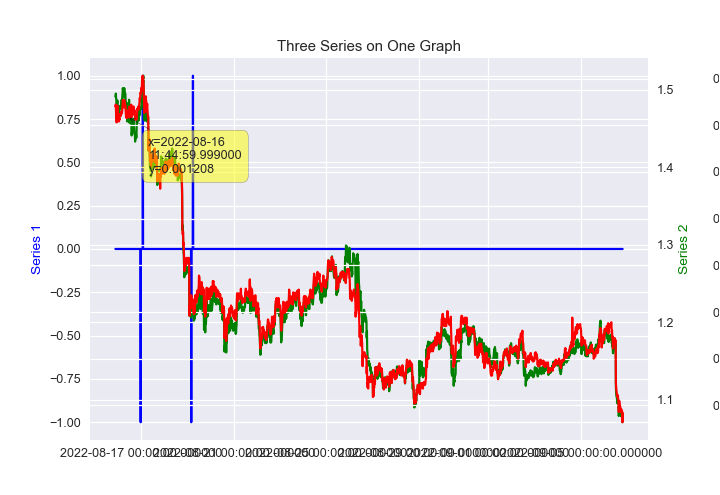

In [171]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors

# create the figure and the left, middle, and right axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# offset the third axis to the right
ax3.spines['right'].set_position(('axes', 1.1))

# plot the first series on the left axis in blue
ax1.plot(big_signal.index, big_signal[('THETAUSDT', 'DENTUSDT')], color='blue')
ax1.set_ylabel('Series 1', color='blue')

# slice the "THETAUSDT" series to match the length of big_signal.index
cl_slice = cl.loc[big_signal.index, "THETAUSDT"]

cl_slice1 = cl.loc[big_signal.index, "DENTUSDT"]

# plot the second series on the middle axis in green
ax2.plot(big_signal.index, cl_slice, color='green')
ax2.set_ylabel('Series 2', color='green')

# plot the third series on the right axis in red
ax3.plot(big_signal.index, cl_slice1, color='red')
ax3.set_ylabel('Series 3', color='red')

# add a title and labels for the x-axis and all y-axes
plt.title('Three Series on One Graph')
plt.xlabel('X Values')

date_fmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f')
ax1.xaxis.set_major_formatter(date_fmt)

# create a cursor that displays the x and y values on hover for the first axis
mplcursors.cursor(ax3, hover=True)

plt.show()


In [89]:
sg = position[position[('IOSTUSDT', 'WINUSDT')]!= 0]
sg = sg[('IOSTUSDT', 'WINUSDT')]
sg

2023-02-20 02:59:59.999    0.000105
2023-02-21 04:29:59.999   -0.000122
2023-03-02 04:44:59.999    0.000099
Name: (IOSTUSDT, WINUSDT), dtype: float64

In [383]:
return_df = pd.DataFrame.from_dict({col: data['overall_return'] for col, data in returns.items()}, orient='index', columns=['Overall Return'])

print(return_df)

                      Overall Return
(XRPUSDT, ONGUSDT)          0.006397
(QTUMUSDT, CELRUSDT)       -0.030000
(COSUSDT, OMGUSDT)          0.052031
(XLMUSDT, ALGOUSDT)        -0.001069
(EOSUSDT, XLMUSDT)         -0.015014
...                              ...
(LTCUSDT, ICXUSDT)         -0.059100
(ONGUSDT, ETHUSDT)         -0.022116
(ALGOUSDT, ADAUSDT)        -0.030000
(NULSUSDT, ADAUSDT)         0.007407
(DOCKUSDT, NULSUSDT)       -0.044180

[71 rows x 1 columns]


In [384]:
return_df.sum()

Overall Return   -0.996058
dtype: float64

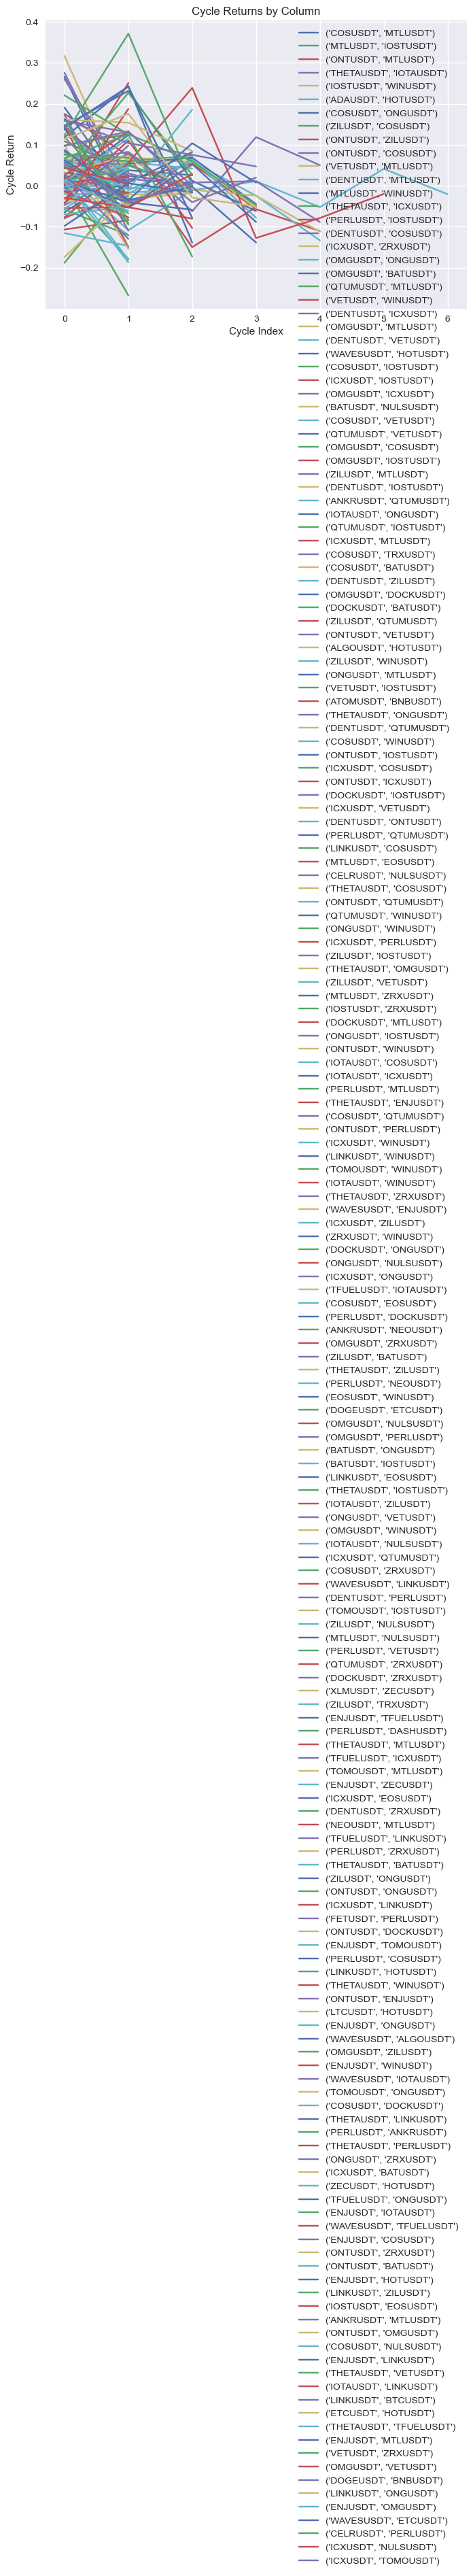

In [82]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each cycle returns as a line with a different color
for col, data in returns.items():
    ax.plot(data['cycle_returns'], label=col)

# Set the labels and title of the plot
ax.set_xlabel('Cycle Index')
ax.set_ylabel('Cycle Return')
ax.set_title('Cycle Returns by Column')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


In [134]:
import pandas as pd

cycles = {}
for col in position.columns:
    cycles[col] = []
    buy_idx = None
    cycle_count = 0  # counter for number of buy-sell cycles
    for i, val in enumerate(position[col]):
        if val < 0:
            # found a buy point
            if buy_idx is None:
                buy_idx = i
        elif val > 0:
            # found a sell point
            if buy_idx is not None:
                cycles[col].append((buy_idx, i))
                buy_idx = None
                cycle_count += 1
    print(f"Column {col} has {cycle_count} buy-sell cycles.")

# calculate the return for each buy-sell cycle and for the overall column
returns = {}
for col, cycle_list in cycles.items():
    total_return = 1
    cycle_returns = []
    for cycle in cycle_list:
        buy_price = position.iloc[cycle[0], position.columns.get_loc(col)]
        sell_price = position.iloc[cycle[1], position.columns.get_loc(col)]
        cycle_return = (buy_price + sell_price) / -buy_price
        cycle_returns.append(cycle_return)
        total_return *= (1 + cycle_return)
    overall_return = total_return - 1
    returns[col] = {'cycle_returns': cycle_returns, 'overall_return': overall_return}

# print the results
for col, data in returns.items():
    print(f"Column {col}")
    print(f"Cycle returns: {data['cycle_returns']}")
    print(f"Overall return: {data['overall_return']}")
    print()


Column ('COSUSDT', 'MTLUSDT') has 2 buy-sell cycles.
Column ('IOSTUSDT', 'MTLUSDT') has 2 buy-sell cycles.
Column ('ONTUSDT', 'MTLUSDT') has 1 buy-sell cycles.
Column ('IOTAUSDT', 'THETAUSDT') has 3 buy-sell cycles.
Column ('IOSTUSDT', 'WINUSDT') has 3 buy-sell cycles.
Column ('VETUSDT', 'MTLUSDT') has 1 buy-sell cycles.
Column ('COSUSDT', 'ONGUSDT') has 2 buy-sell cycles.
Column ('ZILUSDT', 'COSUSDT') has 2 buy-sell cycles.
Column ('ONTUSDT', 'COSUSDT') has 4 buy-sell cycles.
Column ('DENTUSDT', 'MTLUSDT') has 4 buy-sell cycles.
Column ('PERLUSDT', 'COSUSDT') has 2 buy-sell cycles.
Column ('QTUMUSDT', 'MTLUSDT') has 2 buy-sell cycles.
Column ('ZILUSDT', 'ONTUSDT') has 4 buy-sell cycles.
Column ('WINUSDT', 'MTLUSDT') has 1 buy-sell cycles.
Column ('COSUSDT', 'LINKUSDT') has 0 buy-sell cycles.
Column ('ICXUSDT', 'THETAUSDT') has 2 buy-sell cycles.
Column ('VETUSDT', 'DENTUSDT') has 4 buy-sell cycles.
Column ('HOTUSDT', 'ADAUSDT') has 6 buy-sell cycles.
Column ('OMGUSDT', 'MTLUSDT') has 

Column ('COSUSDT', 'MTLUSDT')
Cycle returns: [0.23244929797191902, 0.0]
Overall return: 0.23244929797191904

Column ('IOSTUSDT', 'MTLUSDT')
Cycle returns: [0.04911955514365162, 0.367513611615245]
Overall return: 0.4346852718706742

Column ('ONTUSDT', 'MTLUSDT')
Cycle returns: [0.03862660944206]
Overall return: 0.03862660944205998

Column ('IOTAUSDT', 'THETAUSDT')
Cycle returns: [0.03762291577597265, -0.049566294919454815, 0.11021069692058359]
Overall return: 0.09488067704610015

Column ('IOSTUSDT', 'WINUSDT')
Cycle returns: [0.054166666666666814, 0.09071729957805903, 0.04808548530721272]
Overall return: 0.20508640615039342

Column ('VETUSDT', 'MTLUSDT')
Cycle returns: [0.07195421095666399]
Overall return: 0.07195421095666399

Column ('COSUSDT', 'ONGUSDT')
Cycle returns: [0.05183946488294306, -0.03318250377073902]
Overall return: 0.01693679787325264

Column ('ZILUSDT', 'COSUSDT')
Cycle returns: [0.055307454482995545, 0.09656652360515021]
Overall return: 0.15721482669701858

Column ('ONT

In [157]:
# Assuming your data is in a pandas series called `sga`
positive_count = (return_df > 0).sum()
print("Number of positive values greater than 0: ", positive_count)
negative_count = (return_df < 0).sum()
print("Number of negative values lower than 0: ", negative_count)

Number of positive values greater than 0:  Overall Return    60
dtype: int64
Number of negative values lower than 0:  Overall Return    70
dtype: int64


In [138]:
import pandas as pd
import statistics

cycles = {}
for col in position.columns:
    cycles[col] = []
    buy_idx = None
    cycle_count = 0  # counter for number of buy-sell cycles
    for i, val in enumerate(position[col]):
        if val < 0:
            # found a buy point
            if buy_idx is None:
                buy_idx = i
        elif val > 0:
            # found a sell point
            if buy_idx is not None:
                cycles[col].append((buy_idx, i))
                buy_idx = None
                cycle_count += 1

# calculate the return for each buy-sell cycle and for the overall column
returns = {}
winning_cycle_counts = []
losing_cycle_counts = []

for col, cycle_list in cycles.items():
    total_return = 1
    cycle_returns = []
    for cycle in cycle_list:
        buy_price = position.iloc[cycle[0], position.columns.get_loc(col)]
        sell_price = position.iloc[cycle[1], position.columns.get_loc(col)]
        cycle_return = (buy_price + sell_price) / -buy_price
        cycle_returns.append(cycle_return)
        total_return *= (1 + cycle_return)
    overall_return = total_return - 1
    returns[col] = {'cycle_returns': cycle_returns, 'overall_return': overall_return}
    
    cycle_count = len(cycle_list)
    if overall_return > 0:
        winning_cycle_counts.append(cycle_count)
    elif overall_return < 0:
        losing_cycle_counts.append(cycle_count)

# count the frequency of cycle counts for both positive and negative overall returns
winning_cycle_counts_freq = {i:winning_cycle_counts.count(i) for i in set(winning_cycle_counts)}
losing_cycle_counts_freq = {i:losing_cycle_counts.count(i) for i in set(losing_cycle_counts)}

# calculate the median and mode of the cycle counts for each group
winning_median = statistics.median(winning_cycle_counts)
losing_median = statistics.median(losing_cycle_counts)
winning_mode = statistics.mode(winning_cycle_counts)
losing_mode = statistics.mode(losing_cycle_counts)

print("Winning Cycle Counts Frequency:", winning_cycle_counts_freq)
print("Losing Cycle Counts Frequency:", losing_cycle_counts_freq)
print("Winning Median Cycle Count:", winning_median)
print("Losing Median Cycle Count:", losing_median)
print("Winning Mode Cycle Count:", winning_mode)
print("Losing Mode Cycle Count:", losing_mode)


Winning Cycle Counts Frequency: {1: 37, 2: 63, 3: 25, 4: 18, 5: 1, 6: 4, 7: 1}
Losing Cycle Counts Frequency: {1: 3, 2: 10, 3: 7, 4: 3, 5: 2}
Winning Median Cycle Count: 2
Losing Median Cycle Count: 2
Winning Mode Cycle Count: 2
Losing Mode Cycle Count: 2
